In [1]:
code_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/code')
os.chdir(code_dir)

# load packages
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from clinics_desc_functions import merge_and_reorder, desc_boxplots 

# formatiing
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [2]:
# where things are
cdata_dir = ('/home/barbora/Documents/Projects/2021_06_AZV_ESO/data')
fsdata_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/fs_stats')
images_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/img')

In [3]:
# load clinics from the first visit
clinics = pd.read_excel(os.path.join(cdata_dir,'visit1_desc.xlsx')) 

# rename the czech columns
clinics.columns = ["Visit_ID", "HYDRA_ID", "Full_HYDRA_ID", "Special_ID", "Inclusion", 
                    "Inclusion_Comment", "Category", "Birth", "Sex", "Comment",
                    'Age_at_Visit', 'Date_of_Visit', 'No_Visit', "Dir_Name", 'Visit_Comment','Project',
                    'Completion_Comment', 'List_of_Series','Place_of_Measurement', 'Siblings_Patients',
                    'Siblings_Healthy', 'Laterality_EHI', 'Right_Handed']

# Change the values of categorical variables from czech to english
clinics['Category'] = clinics['Category'].str[:].str.upper().map({'PACIENT':'Patient', 'KONTROLA':'Control', 'SOUROZENEC':'Sibling', 'HIGH RISK':'High_risk'})
clinics['Inclusion'] = clinics['Inclusion'].str[:].str.upper().map({'ZAŘAZENA':'Included', 'ZAŘAZENA S VÝHRADAMI':'Included with Reservations'})

# we need to create a correct index for merging dataframes
idx = clinics["Dir_Name"]

for iid in range(0, clinics.shape[0]):
    iname = idx[iid]
    name = iname.split("_")[1]+ '_' + iname.split("_")[-1]
    if iid == 0:
        names = name
    else:
        names = np.append(names,name)

clinics.index = names

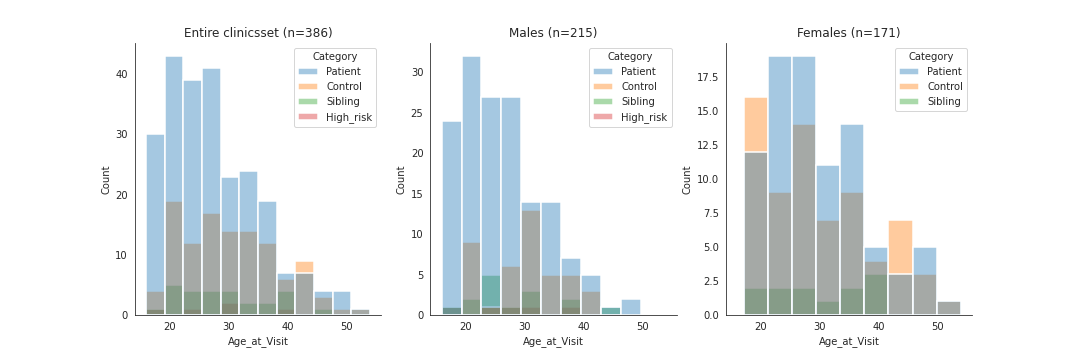

In [4]:
# Description of the clinics - Visit 1
sns.set_style("white")
fig, axes = plt.subplots(1,3, sharex=True,figsize=(15,5))
axes[0].set_title('Entire clinicsset (n='+str(clinics.shape[0])+')')
sns.histplot(data=clinics, x="Age_at_Visit",hue="Category",alpha=.4, linewidth=1.5,ax = axes[0])
axes[1].set_title('Males (n='+str(clinics[(clinics["Sex"]=="M")].shape[0])+')')
sns.histplot(data=clinics[(clinics["Sex"]=="M")], x="Age_at_Visit",hue="Category",alpha=.4, linewidth=1.5,ax = axes[1])
axes[2].set_title('Females (n='+str(clinics[(clinics["Sex"]=="F")].shape[0])+')')
sns.histplot(data=clinics[(clinics["Sex"]=="F")], x="Age_at_Visit",hue="Category",alpha=.4, linewidth=1.5,ax = axes[2])
sns.despine()



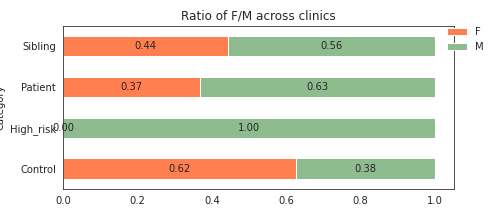

In [5]:
sdist = pd.crosstab(clinics["Category"],clinics["Sex"], normalize="index")
ndist = pd.crosstab(clinics["Category"],clinics["Sex"])

ax = sdist.plot(kind="barh", stacked=True, title="Ratio of F/M across clinics", mark_right=True, figsize=(7,3), color = ["coral", "darkseagreen"])
ax.legend(loc="upper right", frameon=False, bbox_to_anchor=(1.1, 1.05))

for c in ax.containers:
    ax.bar_label(c, fmt="%2.2f", label_type="center")
    

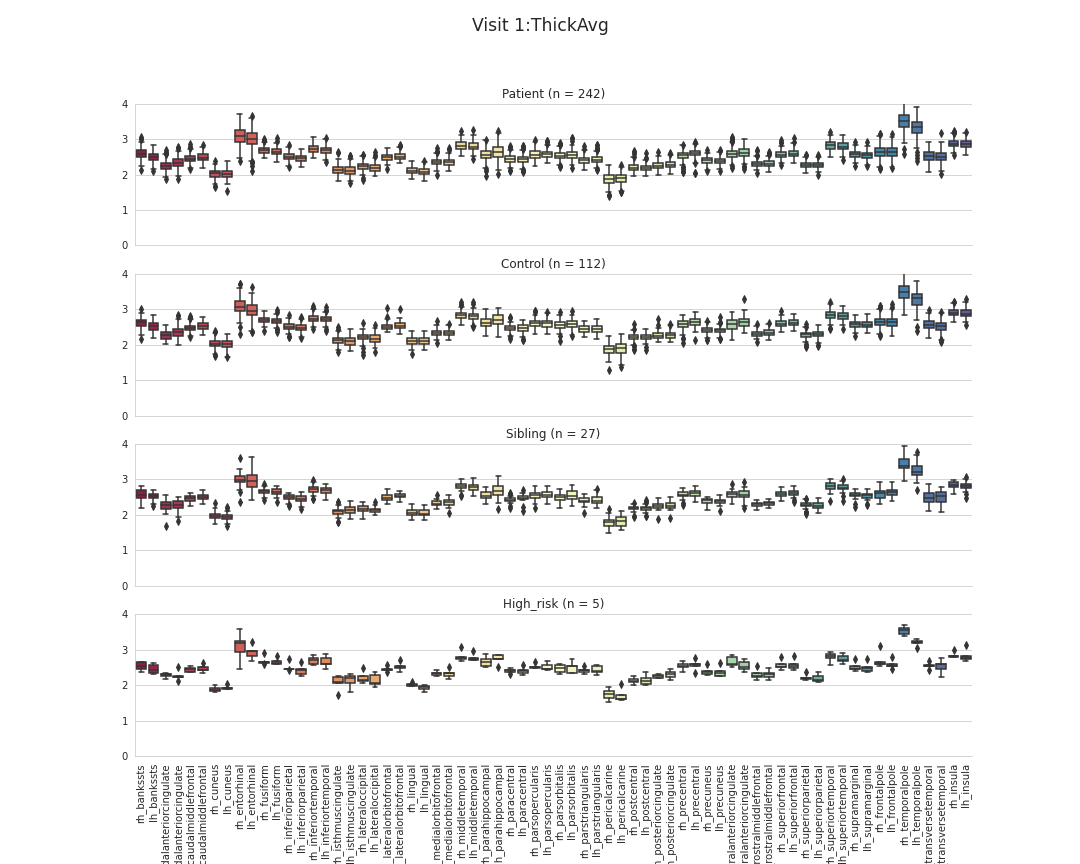

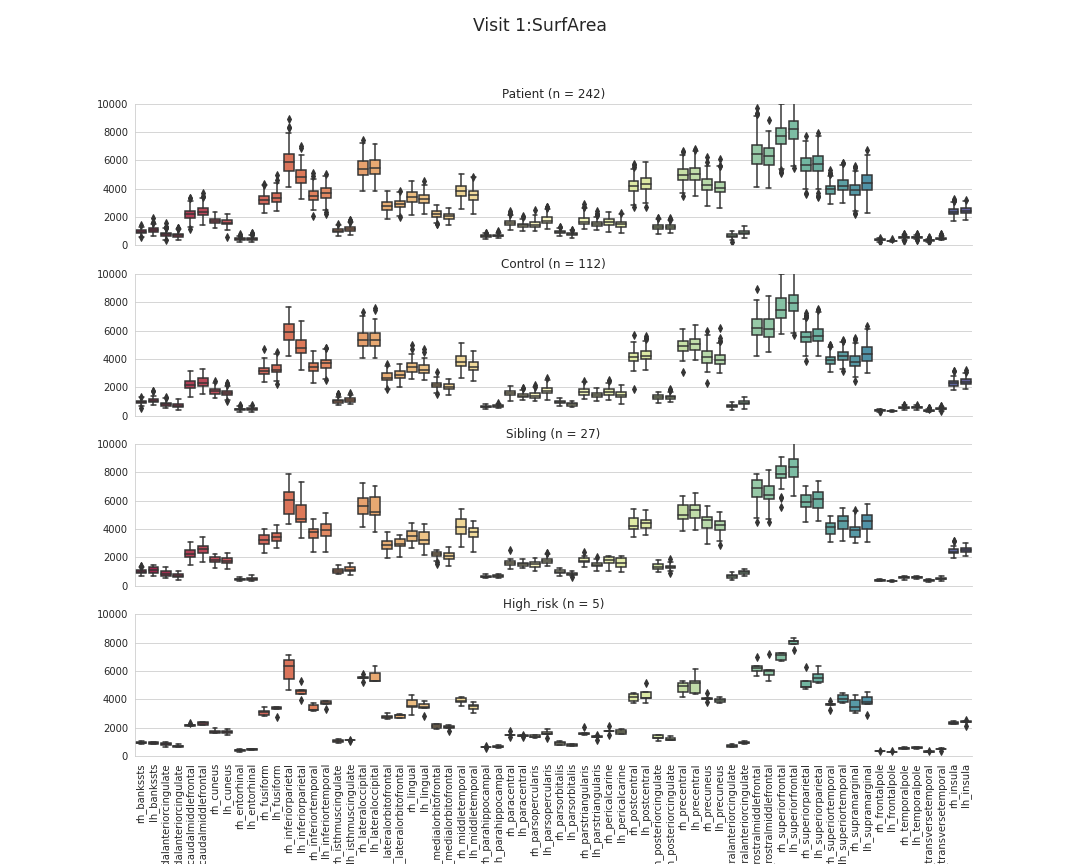

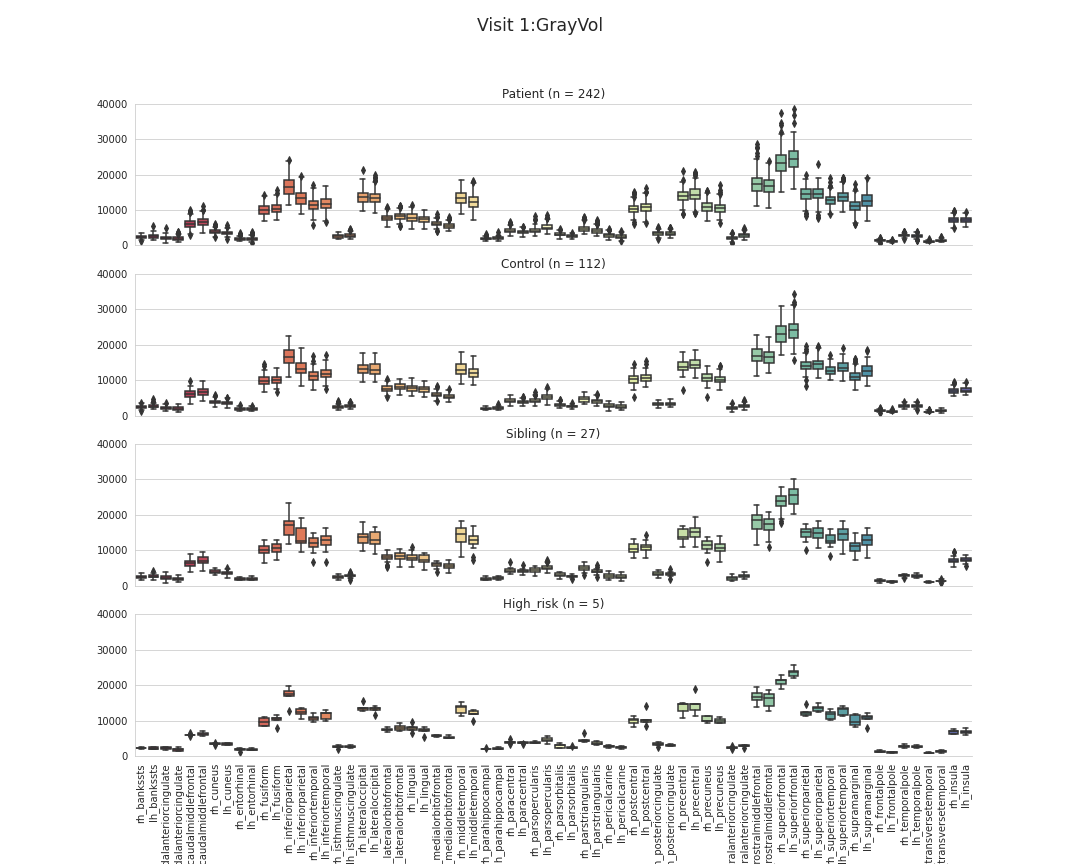

In [6]:
# which fs textfile to load?
fs_files = glob.glob(os.path.join(fsdata_dir,'aparc*.txt'))
fs_vars = ["ThickAvg", "SurfArea", "GrayVol"]

for fs_suffix in fs_vars:
    
    # pick the correct datafile
    fs_file = [s for s in fs_files if fs_suffix in s]
    neuro = pd.read_csv(fs_file[0], sep=";", index_col = 0)

    # create the dataset
    data = merge_and_reorder(clinics, neuro)

    # plot images
    desc_boxplots(data, fs_suffix, images_dir)    



#fs_suffix = "ThickAvg"
#fs_file = [s for s in fs_files if fs_suffix in s]
#neuro = pd.read_csv(fs_file[0], sep=";", index_col = 0)